In [12]:
#import tensorflow as tf
import numpy as np
import math
import glob
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,savefig
from dataset import *

from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate
import mylib as ml2

from sklearn.svm import SVC, LinearSVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from xgboost import XGBClassifier
#from sklearn.cross_validation import cross_val_score, ShuffleSplit

from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import pandas as pd
import plotly.figure_factory as ff

#setting offilne
plotly.offline.init_notebook_mode(connected=True)
 

In [13]:
cutsize = 256
head_of_name = 'networks7_1030'
circle_num =2
input_shape = (640*circle_num,3)
data_path = '/home/silver-bullet/newpaper/data/dataset/'
dataset, label = load_dataset(data_path, circle_num, cutsize)


x_number = dataset.shape[0]
feature_data = feature_extractor2(dataset)
print('feature_data.shape: ', feature_data.shape)
x = feature_data.reshape(x_number,-1)
all_feature_data = x

print('x.shape: ',x.shape)
y = label.reshape(x_number,)
print('y.shape: ', y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=56)
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ',X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


dataset shape :  (3710, 1280, 3)
label shape :  (3710, 1)
p1.shape:  (3710, 3)
p2.shape:  (3710, 3)
p3.shape:  (3710, 3)
p4.shape:  (3710, 3)
p5.shape:  (3710, 3)
p6.shape:  (3710, 3)
p7.shape:  (3710, 3)
p8.shape:  (3710, 3)
p9.shape:  (3710, 3)
feature_data.shape:  (3710, 9, 3)
x.shape:  (3710, 27)
y.shape:  (3710,)
X_train.shape:  (2968, 27)
X_test.shape:  (742, 27)
y_train.shape:  (2968,)
y_test.shape:  (742,)


In [14]:
#----------------------------------SVM----------------------------#

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train,y_test))
print('X_train_std.shape: ',X_train_std.shape)

#svm = SVC(kernel='linear',C=1.0,random_state= 0)
svm = LinearSVC(max_iter=10000)
"""
scores = []

for i in range(X_train.shape[1]):
    score = cross_val_score(svm, X_train_std[:, i:i+1],y_train,scoring=)
"""
svm.fit(X_train_std,y_train)

predict_y = svm.predict(X_test_std)
print('SVM result: ')
print('predict_x.shape: ', predict_y.shape)

ml2.evaluate_model2(predict_y, y_test)

# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if predict_y[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Total Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

#feature_ranker = SelectKBest(score_func=mutual_info_classif, k=20).fit(x,y)

print(svm.coef_.shape)
#print(svm.coef_)
print(np.argsort(-svm.coef_,axis=1))

X_train_std.shape:  (2968, 27)
SVM result: 
predict_x.shape:  (742,)
normal result:
tp: 130  tn: 0  fp: 5  fn: 607
tp/(tp+tn):  1.0
tp/(tp+fp):  0.9629629629629629
inner_ring result:
tp: 148  tn: 15  fp: 29  fn: 550
tp/(tp+tn):  0.9079754601226994
tp/(tp+fp):  0.8361581920903954
outer_ring result:
tp: 140  tn: 12  fp: 18  fn: 572
tp/(tp+tn):  0.9210526315789473
tp/(tp+fp):  0.8860759493670886
roller result:
tp: 121  tn: 10  fp: 14  fn: 597
tp/(tp+tn):  0.9236641221374046
tp/(tp+fp):  0.8962962962962963
joint result:
tp: 123  tn: 43  fp: 14  fn: 562
tp/(tp+tn):  0.7409638554216867
tp/(tp+fp):  0.8978102189781022
Total Accuracy: 89.22 % 
(5, 27)
[[17  6 21  3 10 22  0 24 11 25  8 14 13 26 12 15 16 20 18  7 23  5  9  2
  19  4  1]
 [17  8 15 19  1 16 20  6 18 14 10 11 25 12 13  7  9 24  3  5  4 26  0 21
   2 22 23]
 [ 2  1 15 18  5  4 16 23 14 10 20 12 13  9 17  6 26 24  3  0 22 11 19 25
  21  7  8]
 [16 19 20  0  3 18 15  6 17  2 23 13  5 12 24  9 14  7 11 26  4 25 21 10
   8  1 22]
 [ 0

XGBoost result: 
ans.shape:  (742,)
normal result:
tp: 129  tn: 1  fp: 2  fn: 610
tp/(tp+tn):  0.9923076923076923
tp/(tp+fp):  0.9847328244274809
inner_ring result:
tp: 155  tn: 8  fp: 9  fn: 570
tp/(tp+tn):  0.950920245398773
tp/(tp+fp):  0.9451219512195121
outer_ring result:
tp: 150  tn: 2  fp: 3  fn: 587
tp/(tp+tn):  0.9868421052631579
tp/(tp+fp):  0.9803921568627451
roller result:
tp: 121  tn: 10  fp: 8  fn: 603
tp/(tp+tn):  0.9236641221374046
tp/(tp+fp):  0.937984496124031
joint result:
tp: 154  tn: 12  fp: 11  fn: 565
tp/(tp+tn):  0.927710843373494
tp/(tp+fp):  0.9333333333333333
Accuracy: 95.55 % 
(27,)
[0.02496503 0.05948028 0.0876363  0.02441377 0.01297413 0.0103013
 0.05159574 0.21280919 0.0241844  0.01954321 0.03171937 0.01425262
 0.0148434  0.02751917 0.01787115 0.01067038 0.01171924 0.0075938
 0.11729173 0.12763514 0.02501609 0.01401944 0.01016592 0.01021971
 0.01072626 0.00865911 0.01217417]
[ 7 19 18  2  1  6 10 13 20  0  3  8  9 14 12 11 21  4 26 16 24 15  5 23
 22 25 1

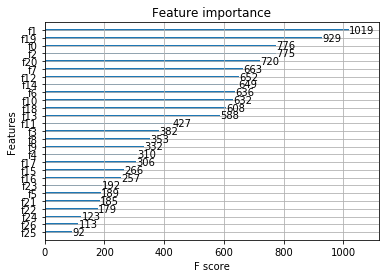

In [15]:
#---------------------XGBoost----------------------------#
"""
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 5,
    'gamma': 0.1,
    'max_depth': 8,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}
plst = params.items()
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 1000
model = xgb.train(plst, dtrain, num_rounds)
"""
model = XGBClassifier(learning_rate=0.1,
                        n_estimators=1000,         # 树的个数--1000棵树建立xgboost
                        max_depth=6,               # 树的深度
                        min_child_weight = 1,      # 叶子节点最小权重
                        gamma=0.1,                  # 惩罚项中叶子结点个数前的参数
                        subsample=0.8,             # 随机选择80%样本建立决策树
                        colsample_btree=0.8,       # 随机选择80%特征建立决策树
                        objective='multi:softmax', # 指定损失函数
                        scale_pos_weight=1,        # 解决样本个数不平衡的问题
                        random_state=27)            # 随机数
model.fit(X_train,y_train)
# 对测试集进行预测
#dtest = xgb.DMatrix(X_test)
#ans = model.predict(dtest)
ans = model.predict(X_test)
print('XGBoost result: ')
print('ans.shape: ', ans.shape)
ml2.evaluate_model2(ans, y_test)
# 计算准确率
cnt1 = 0
cnt2 = 0

for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

print(model.feature_importances_.shape)
print(model.feature_importances_)
print(np.argsort(-model.feature_importances_))


# 显示重要特征
plot_importance(model)
plt.show()


In [16]:
#--------------------------select feature-------------------------------#
print('start select common feature')
select_feature_num = 18
svm_feature_index = np.argsort(-svm.coef_,axis=1)[:,:select_feature_num]
xgb_feature_index = np.argsort(-model.feature_importances_)[:select_feature_num].T
print(xgb_feature_index.shape)
select_method = 1
common_feature = select_svm_xgboost_common_feature(svm_feature_index,xgb_feature_index,select_feature_num,select_method)
print(common_feature)
class_name = ['normal', 'inner ring', 'outer ring', 'ball', 'joint']

start select common feature
(18,)
[[0, 3, 6, 8, 10, 11, 12, 13, 14, 20, 21], [1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20], [1, 2, 4, 6, 9, 10, 12, 13, 14, 18, 20], [0, 2, 3, 6, 7, 9, 12, 13, 14, 18, 19, 20], [0, 3, 4, 7, 8, 9, 10, 12, 13, 14, 18, 19, 20, 21]]


In [17]:
if select_method==1:
    for i in range(len(common_feature)):
        print(class_name[i]+' result: ')
        select_feature = common_feature[i]
        select_feature_data = all_feature_data[:,select_feature]
        print(select_feature_data.shape)
        x = select_feature_data
        print('x.shape: ',x.shape)
        y = label.reshape(x_number,)
        print('y.shape: ', y.shape)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        print('X_train.shape: ', X_train.shape)
        print('X_test.shape: ',X_test.shape)
        print('y_train.shape: ', y_train.shape)
        print('y_test.shape: ', y_test.shape)
        
        sc1 = StandardScaler()
        sc1.fit(X_train)

        X_train_std = sc1.transform(X_train)
        X_test_std = sc1.transform(X_test)

        X_combined_std = np.vstack((X_train_std,X_test_std))
        y_combined_std = np.hstack((y_train,y_test))
        print('X_train_std.shape: ',X_train_std.shape)

        #svm = SVC(kernel='linear',C=1.0,random_state= 0)
        svm = LinearSVC(max_iter=10000)
        svm.fit(X_train_std,y_train)

        predict_y = svm.predict(X_test_std)
        print('SVM result: ')
        print('predict_x.shape: ', predict_y.shape)

        ml2.evaluate_model2(predict_y, y_test)

        # 计算准确率
        cnt1 = 0
        cnt2 = 0
        for i in range(len(y_test)):
            if predict_y[i] == y_test[i]:
                cnt1 += 1
            else:
                cnt2 += 1

        print("Total Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))
        
        #-----------k fold----------------#

        #scoring = ['accuracy','recalling']
        scoring = ['precision_macro', 'recall_macro']
        #scores = cross_validate(svm, X_test_std, y_test, scoring=scoring,cv=10, return_train_score=True)
        scores_svm = cross_validate(svm, X_train_std, y_train, scoring=scoring,cv=10, return_train_score=True)
        sorted(scores_svm.keys())
        print('test result:')
        print(scores_svm)
        #plot
        init_notebook_mode(connected=True)
        scores_df_svm = pd.DataFrame(scores_svm)
        scores_df_svm
        
        xgboost_model = XGBClassifier(learning_rate=0.1,
                        n_estimators=1000,         # 树的个数--1000棵树建立xgboost
                        max_depth=6,               # 树的深度
                        min_child_weight = 1,      # 叶子节点最小权重
                        gamma=0.1,                  # 惩罚项中叶子结点个数前的参数
                        subsample=0.8,             # 随机选择80%样本建立决策树
                        colsample_btree=0.8,       # 随机选择80%特征建立决策树
                        objective='multi:softmax', # 指定损失函数
                        scale_pos_weight=1,        # 解决样本个数不平衡的问题
                        random_state=27)            # 随机数
        xgboost_model.fit(X_train,y_train)
        # 对测试集进行预测
        #dtest = xgb.DMatrix(X_test)
        #ans = model.predict(dtest)
        ans = xgboost_model.predict(X_test)
        print('XGBoost result: ')
        print('ans.shape: ', ans.shape)
        ml2.evaluate_model2(ans, y_test)
        # 计算准确率
        cnt1 = 0
        cnt2 = 0

        for i in range(len(y_test)):
            if ans[i] == y_test[i]:
                cnt1 += 1
            else:
                cnt2 += 1

        print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))
        
        scores_xgb = cross_validate(xgboost_model, X_train, y_train, scoring=scoring,cv=10, return_train_score=True)
        sorted(scores_xgb.keys())
        print('test result:')
        print(scores_xgb)
        scores_df_xgb = pd.DataFrame(scores_xgb)
        scores_df_xgb
        
else:
    select_feature = common_feature
    select_feature_data = all_feature_data[:,select_feature]
    print(select_feature_data.shape)
    x = select_feature_data
    print('x.shape: ',x.shape)
    y = label.reshape(x_number,)
    print('y.shape: ', y.shape)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    print('X_train.shape: ', X_train.shape)
    print('X_test.shape: ',X_test.shape)
    print('y_train.shape: ', y_train.shape)
    print('y_test.shape: ', y_test.shape)
    
    sc2 = StandardScaler()
    sc2.fit(X_train)

    X_train_std = sc2.transform(X_train)
    X_test_std = sc2.transform(X_test)

    X_combined_std = np.vstack((X_train_std,X_test_std))
    y_combined_std = np.hstack((y_train,y_test))
    print('X_train_std.shape: ',X_train_std.shape)

    #svm = SVC(kernel='linear',C=1.0,random_state= 0)
    svm = LinearSVC(max_iter=10000)
    svm.fit(X_train_std,y_train)

    predict_y = svm.predict(X_test_std)
    print('SVM result: ')
    print('predict_x.shape: ', predict_y.shape)

    ml2.evaluate_model2(predict_y, y_test)

    # 计算准确率
    cnt1 = 0
    cnt2 = 0
    for i in range(len(y_test)):
        if predict_y[i] == y_test[i]:
            cnt1 += 1
        else:
            cnt2 += 1

    print("Total Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))
    
    #-----------k fold----------------#

    #scoring = ['accuracy','recalling']
    scoring = ['precision_macro', 'recall_macro']
    #scores = cross_validate(svm, X_test_std, y_test, scoring=scoring,cv=10, return_train_score=True)
    scores_svm = cross_validate(svm, X_train_std, y_train, scoring=scoring,cv=10, return_train_score=True)
    sorted(scores_svm.keys())
    print('test result:')
    print(scores_svm)
    #plot
    init_notebook_mode(connected=True)
    scores_df_svm = pd.DataFrame(scores_svm)
    scores_df_svm
    
    xgboost_model = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,         # 树的个数--1000棵树建立xgboost
                    max_depth=6,               # 树的深度
                    min_child_weight = 1,      # 叶子节点最小权重
                    gamma=0.1,                  # 惩罚项中叶子结点个数前的参数
                    subsample=0.8,             # 随机选择80%样本建立决策树
                    colsample_btree=0.8,       # 随机选择80%特征建立决策树
                    objective='multi:softmax', # 指定损失函数
                    scale_pos_weight=1,        # 解决样本个数不平衡的问题
                    random_state=27)            # 随机数
    xgboost_model.fit(X_train,y_train)
    # 对测试集进行预测
    #dtest = xgb.DMatrix(X_test)
    #ans = model.predict(dtest)
    ans = xgboost_model.predict(X_test)
    print('XGBoost result: ')
    print('ans.shape: ', ans.shape)
    ml2.evaluate_model2(ans, y_test)
    # 计算准确率
    cnt1 = 0
    cnt2 = 0

    for i in range(len(y_test)):
        if ans[i] == y_test[i]:
            cnt1 += 1
        else:
            cnt2 += 1

    print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))
    
    scores_xgb = cross_validate(xgboost_model, X_train, y_train, scoring=scoring,cv=10, return_train_score=True)
    sorted(scores_xgb.keys())
    print('test result:')
    print(scores_xgb)
    scores_df_xgb = pd.DataFrame(scores_xgb)
    scores_df_xgb


normal result: 
(3710, 11)
x.shape:  (3710, 11)
y.shape:  (3710,)
X_train.shape:  (2968, 11)
X_test.shape:  (742, 11)
y_train.shape:  (2968,)
y_test.shape:  (742,)
X_train_std.shape:  (2968, 11)
SVM result: 
predict_x.shape:  (742,)
normal result:
tp: 130  tn: 0  fp: 10  fn: 602
tp/(tp+tn):  1.0
tp/(tp+fp):  0.9285714285714286
inner_ring result:
tp: 132  tn: 18  fp: 26  fn: 566
tp/(tp+tn):  0.88
tp/(tp+fp):  0.8354430379746836
outer_ring result:
tp: 151  tn: 22  fp: 16  fn: 553
tp/(tp+tn):  0.8728323699421965
tp/(tp+fp):  0.9041916167664671
roller result:
tp: 132  tn: 19  fp: 20  fn: 571
tp/(tp+tn):  0.8741721854304636
tp/(tp+fp):  0.868421052631579
joint result:
tp: 103  tn: 35  fp: 22  fn: 582
tp/(tp+tn):  0.7463768115942029
tp/(tp+fp):  0.824
Total Accuracy: 87.33 % 
test result:
{'fit_time': array([0.55363202, 0.78246999, 0.72338414, 0.54684854, 0.50318003,
       0.52975845, 0.52701211, 0.63574934, 0.51156712, 0.56529355]), 'score_time': array([0.00169277, 0.00214911, 0.00137377, 

XGBoost result: 
ans.shape:  (742,)
normal result:
tp: 130  tn: 0  fp: 3  fn: 609
tp/(tp+tn):  1.0
tp/(tp+fp):  0.9774436090225563
inner_ring result:
tp: 141  tn: 9  fp: 13  fn: 579
tp/(tp+tn):  0.94
tp/(tp+fp):  0.9155844155844156
outer_ring result:
tp: 161  tn: 12  fp: 18  fn: 551
tp/(tp+tn):  0.930635838150289
tp/(tp+fp):  0.8994413407821229
roller result:
tp: 136  tn: 15  fp: 14  fn: 577
tp/(tp+tn):  0.9006622516556292
tp/(tp+fp):  0.9066666666666666
joint result:
tp: 113  tn: 25  fp: 13  fn: 591
tp/(tp+tn):  0.8188405797101449
tp/(tp+fp):  0.8968253968253969
Accuracy: 91.78 % 
test result:
{'fit_time': array([12.54493785, 11.51717353, 12.82803822, 11.30409741, 11.73653245,
       13.43628383, 13.87549639, 15.00758982, 12.58406973, 13.63386917]), 'score_time': array([0.10836577, 0.06209946, 0.07237935, 0.06978321, 0.07450271,
       0.08004665, 0.0616498 , 0.07402515, 0.09236264, 0.09789419]), 'train_precision_macro': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_precision

XGBoost result: 
ans.shape:  (742,)
normal result:
tp: 116  tn: 0  fp: 1  fn: 625
tp/(tp+tn):  1.0
tp/(tp+fp):  0.9914529914529915
inner_ring result:
tp: 152  tn: 7  fp: 16  fn: 567
tp/(tp+tn):  0.9559748427672956
tp/(tp+fp):  0.9047619047619048
outer_ring result:
tp: 148  tn: 9  fp: 4  fn: 581
tp/(tp+tn):  0.9426751592356688
tp/(tp+fp):  0.9736842105263158
roller result:
tp: 144  tn: 6  fp: 11  fn: 581
tp/(tp+tn):  0.96
tp/(tp+fp):  0.9290322580645162
joint result:
tp: 137  tn: 23  fp: 13  fn: 569
tp/(tp+tn):  0.85625
tp/(tp+fp):  0.9133333333333333
Accuracy: 93.94 % 
test result:
{'fit_time': array([14.36163068, 11.7713511 , 10.85746455, 10.8856256 , 10.87631249,
       10.82171488, 10.93559647, 10.82070732, 10.66030025, 10.91719151]), 'score_time': array([0.0913868 , 0.05250192, 0.05232811, 0.05149913, 0.05144787,
       0.05537486, 0.06177425, 0.04988575, 0.0496788 , 0.05092955]), 'train_precision_macro': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_precision_macro': arra

XGBoost result: 
ans.shape:  (742,)
normal result:
tp: 129  tn: 0  fp: 0  fn: 613
tp/(tp+tn):  1.0
tp/(tp+fp):  1.0
inner_ring result:
tp: 139  tn: 10  fp: 11  fn: 582
tp/(tp+tn):  0.9328859060402684
tp/(tp+fp):  0.9266666666666666
outer_ring result:
tp: 158  tn: 4  fp: 7  fn: 573
tp/(tp+tn):  0.9753086419753086
tp/(tp+fp):  0.9575757575757575
roller result:
tp: 163  tn: 15  fp: 8  fn: 556
tp/(tp+tn):  0.9157303370786517
tp/(tp+fp):  0.9532163742690059
joint result:
tp: 115  tn: 9  fp: 12  fn: 606
tp/(tp+tn):  0.9274193548387096
tp/(tp+fp):  0.905511811023622
Accuracy: 94.88 % 
test result:
{'fit_time': array([10.07110572, 10.10132861, 10.04200339, 10.21345067, 10.17614388,
       10.07834864,  9.92452598,  9.97110367, 10.0941577 , 10.07448626]), 'score_time': array([0.0550828 , 0.06566191, 0.05628181, 0.0562315 , 0.05590463,
       0.05461788, 0.0551331 , 0.05589867, 0.05740023, 0.05555797]), 'train_precision_macro': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_precision_mac

XGBoost result: 
ans.shape:  (742,)
normal result:
tp: 128  tn: 0  fp: 4  fn: 610
tp/(tp+tn):  1.0
tp/(tp+fp):  0.9696969696969697
inner_ring result:
tp: 144  tn: 10  fp: 5  fn: 583
tp/(tp+tn):  0.935064935064935
tp/(tp+fp):  0.9664429530201343
outer_ring result:
tp: 155  tn: 7  fp: 4  fn: 576
tp/(tp+tn):  0.9567901234567902
tp/(tp+fp):  0.9748427672955975
roller result:
tp: 140  tn: 5  fp: 18  fn: 579
tp/(tp+tn):  0.9655172413793104
tp/(tp+fp):  0.8860759493670886
joint result:
tp: 138  tn: 15  fp: 6  fn: 583
tp/(tp+tn):  0.9019607843137255
tp/(tp+fp):  0.9583333333333334
Accuracy: 95.01 % 
test result:
{'fit_time': array([10.34528685, 10.48924398, 10.68820047, 10.60131717, 10.34529781,
       10.50240159, 10.47889638, 10.51161575, 10.47305632, 10.45515704]), 'score_time': array([0.05176187, 0.05707002, 0.05337262, 0.05559349, 0.05286407,
       0.05467534, 0.0532372 , 0.05308008, 0.05221105, 0.05257773]), 'train_precision_macro': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test

XGBoost result: 
ans.shape:  (742,)
normal result:
tp: 112  tn: 0  fp: 4  fn: 626
tp/(tp+tn):  1.0
tp/(tp+fp):  0.9655172413793104
inner_ring result:
tp: 150  tn: 12  fp: 10  fn: 570
tp/(tp+tn):  0.9259259259259259
tp/(tp+fp):  0.9375
outer_ring result:
tp: 161  tn: 7  fp: 9  fn: 565
tp/(tp+tn):  0.9583333333333334
tp/(tp+fp):  0.9470588235294117
roller result:
tp: 146  tn: 6  fp: 10  fn: 580
tp/(tp+tn):  0.9605263157894737
tp/(tp+fp):  0.9358974358974359
joint result:
tp: 129  tn: 19  fp: 11  fn: 583
tp/(tp+tn):  0.8716216216216216
tp/(tp+fp):  0.9214285714285714
Accuracy: 94.07 % 
test result:
{'fit_time': array([11.51920986, 11.68575835, 11.43637419, 11.63626552, 11.36182594,
       11.53499103, 11.6117177 , 11.50127769, 11.35534596, 11.45499754]), 'score_time': array([0.05384564, 0.05295348, 0.05196261, 0.05374336, 0.05218744,
       0.0512445 , 0.05250788, 0.05214548, 0.0525527 , 0.05171442]), 'train_precision_macro': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_precisio